DGMD-14 Final Project 
Classifying three Small Ballet Jumps using Machine Learning
GROUP NAME: The Eastenders
NAMES: Ana Boburg Nystedt, Allyson Bieryla

In [162]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set(font_scale=1.2)

READ CSV DATA INTO DATAFRAMES for Acceleration and Gyroscope data.

- Make a list of CSV files in the given directory
- Read selected columns (timestamp, X, Y and Z) into a dataframe



GLISSADE DATA

In [163]:
# THIS IS WILL CLEAN DATA FROM PHONE 
# Import CSV data from phone and put columns that we will use in a dataframe


# DIRECTORY OF CSV FILES GLISSADE ACCEL
dir_name = 'data/glissade/Accel/train'
# make list of CSV files
GA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]
#print(GA_csvs)

# stats.csv -> stats
GA_count = [os.path.splitext(os.path.basename(x))[0] for x in GA_csvs]

# Create a dictionary of dataframes
d_GA = {}  # Glissade Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(GA_count)):
        csvfile = os.path.join(dir_name, GA_csvs[i])
        d_GA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        


# DIRECTORY OF CSV FILES GLISSADE GYRO
dir_name = 'data/glissade/Gyro/train'
# make list of CSV files
GG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
GG_count = [os.path.splitext(os.path.basename(x))[0] for x in GG_csvs]

# Create a dictionary of dataframes
d_GG = {}  # Glissade Gyro data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(GG_count)):
        csvfile = os.path.join(dir_name, GG_csvs[i])
        d_GG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

   PAS-DE-CHAT DATA
  

In [164]:
# NOW work on PAS-DE-CHAT data

# DIRECTORY OF CSV FILES PAS-DE-CHAT ACCEL
dir_name = 'data/pas-de-chat/Accel/train'
# make list of CSV files
PA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]
#print(PA_csvs)

# stats.csv -> stats
PA_count = [os.path.splitext(os.path.basename(x))[0] for x in PA_csvs]

# Create a dictionary of dataframes
d_PA = {}  # Pas-de-chat Accel data 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(PA_count)):
        csvfile = os.path.join(dir_name, PA_csvs[i])
        d_PA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        



# DIRECTORY OF CSV FILES Pas-de-chat GYRO
dir_name = 'data/pas-de-chat/Gyro/train'
# make list of CSV files
PG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
PG_count = [os.path.splitext(os.path.basename(x))[0] for x in PG_csvs]

# Create a dictionary of dataframes
d_PG = {}  # Pas-de-chat Gyro data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(PG_count)):
        csvfile = os.path.join(dir_name, PG_csvs[i])
        d_PG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

JETE DATA

In [165]:
        
        
# NOW work on Jete data

# DIRECTORY OF CSV FILES Jete ACCEL --- there are 2 datasets of Jete. The second is a better dataset

#dir_name = 'data/jete/Accel/train'
dir_name = 'data/jete/Accel/train2'
# make list of CSV files
JA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]
#print(JA_csvs)

# stats.csv -> stats
JA_count = [os.path.splitext(os.path.basename(x))[0] for x in JA_csvs]

# Create a dictionary of dataframes
d_JA = {}  # jete Accel data 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(JA_count)):
        csvfile = os.path.join(dir_name, JA_csvs[i])
        d_JA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_JA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']



# DIRECTORY OF CSV FILES Jete GYRO
dir_name = 'data/jete/Gyro/train'
# make list of CSV files
JG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
JG_count = [os.path.splitext(os.path.basename(x))[0] for x in JG_csvs]

# Create a dictionary of dataframes
d_JG = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(JG_count)):
        csvfile = os.path.join(dir_name, JG_csvs[i])
        d_JG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_JG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']



VISUALIZE the data. 

The code below will plot the X, Y and Z components to help visualize how the jumps differ. We also inspected every jump by eye to remove any data that was bad (i.e. all noise or only half a jump). We removed 1 jump from each dataset for these reasons, so the training models will train on 39 jumps for each jump. The code to plot ALL the data is commented out (since there are so many plots) and for ease of viewing only one jump dataset is plotted by default.

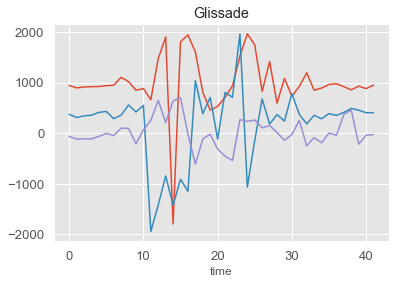

In [166]:
# make PLOTS for  Accel data to visualize (GLISSADE)
from matplotlib import style
style.use("ggplot")

# TO PRINT ALL FILES (uncomment)
#for i in range(len(GA_count)):
#    plt.figure()
#    plt.plot(d_GA[i].Accel_X)
#    plt.plot(d_GA[i].Accel_Y)
#    plt.plot(d_GA[i].Accel_Z)
#    plt.title("Glissade")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis

# print an example plot, first one
plt.figure()
plt.plot(d_GA[24].Accel_X)
plt.plot(d_GA[24].Accel_Y)
plt.plot(d_GA[24].Accel_Z)
plt.title("Glissade")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axisplt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

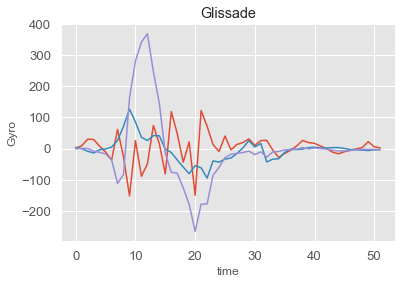

In [167]:
# make PLOTS for Gyro data to visualize (GLISSADE)

# TO PLOT ALL FILES == uncomment
#for i in range(len(GA_count)):
#    plt.figure()
#    plt.plot(d_GG[i].Gyro_X)
#    plt.plot(d_GG[i].Gyro_Y)
#    plt.plot(d_GG[i].Gyro_Z)
#    plt.title("Glissade")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
 

# print an example plot, first one
plt.figure()
plt.plot(d_GG[0].Gyro_X)
plt.plot(d_GG[0].Gyro_Y)
plt.plot(d_GG[0].Gyro_Z)
plt.title("Glissade")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis

plt.show()

In [168]:
## plot the Pas-de-chat data

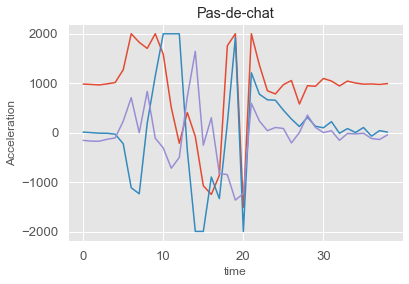

In [169]:
# make PLOTS for Accel data to visualize (PAS-DE-CHAT)

#  TO PLOT ALL FILES -- uncommnet
#for i in range(len(PA_count)):
#    plt.figure()
#    plt.plot(d_PA[i].Accel_X)
#    plt.plot(d_PA[i].Accel_Y)
#    plt.plot(d_PA[i].Accel_Z)
#    plt.title("Pas-de-chat")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis

# print an example plot, first one
plt.figure()
plt.plot(d_PA[3].Accel_X)
plt.plot(d_PA[3].Accel_Y)
plt.plot(d_PA[3].Accel_Z)
plt.title("Pas-de-chat")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

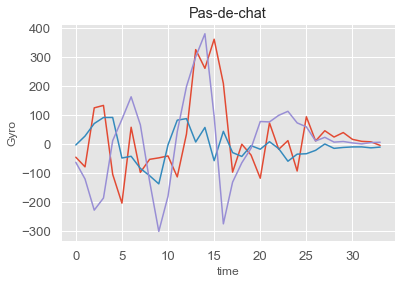

In [170]:
# make PLOTS for Gyro data to visualize (PAS-DE-CHAT)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(PG_count)):
#    plt.figure()
#    plt.plot(d_PG[i].Gyro_X)
#    plt.plot(d_PG[i].Gyro_Y)
#    plt.plot(d_PG[i].Gyro_Z)
#    plt.title("Pas-de-chat")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_PG[5].Gyro_X)
plt.plot(d_PG[5].Gyro_Y)
plt.plot(d_PG[5].Gyro_Z)
plt.title("Pas-de-chat")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()

In [171]:
## plot the Jette data

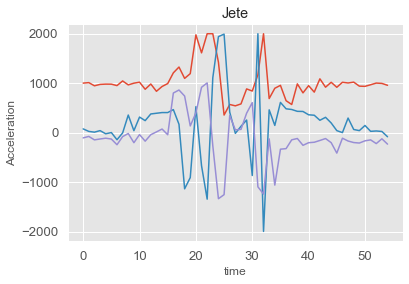

In [172]:
# make PLOTS for Accel data to visualize (Jete)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(JA_count)):
#    plt.figure()
#    plt.plot(d_JA[i].Accel_X)
#    plt.plot(d_JA[i].Accel_Y)
#    plt.plot(d_JA[i].Accel_Z)
#    plt.title("Jette")     # sets the title for the chart
#plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_JA[0].Accel_X)
plt.plot(d_JA[0].Accel_Y)
plt.plot(d_JA[0].Accel_Z)
plt.title("Jete")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

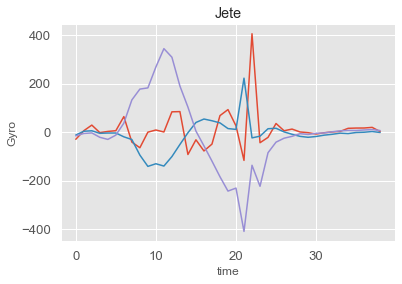

In [173]:
# make PLOTS for Gyro data to visualize (Jete)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(JG_count)):
#    plt.figure()
#    plt.plot(d_JG[i].Gyro_X)
#    plt.plot(d_JG[i].Gyro_Y)
#    plt.plot(d_JG[i].Gyro_Z)
#    plt.title("Jette")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_JG[0].Gyro_X)
plt.plot(d_JG[0].Gyro_Y)
plt.plot(d_JG[0].Gyro_Z)
plt.title("Jete")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()

SUMMARIZE the data. 

This code combines all the jump data for each jump into one dataframe and then does a summary of the statistics. This is another way to determine what features best describe the jumps.

In [174]:
# CONCAT all the csv files  -- UNCOMMENT if you want total summary

#GAcc_all = {}

#GAcc_all = pd.concat([d_GA[0],d_GA[1],d_GA[2],d_GA[3],d_GA[4],d_GA[5],d_GA[6],d_GA[7],d_GA[8],d_GA[9],d_GA[10],d_GA[11],d_GA[12],d_GA[13],d_GA[14],d_GA[15],d_GA[16],d_GA[17],d_GA[18],d_GA[19],d_GA[20],d_GA[21],d_GA[22],d_GA[23],d_GA[24],d_GA[25],d_GA[26],d_GA[27],d_GA[28],d_GA[29],d_GA[30],d_GA[31],d_GA[32],d_GA[33],d_GA[34],d_GA[35],d_GA[36],d_GA[37],d_GA[38],d_GA[39],d_GA[40]])
#PAcc_all = pd.concat([d_PA[0],d_PA[1],d_PA[2],d_PA[3],d_PA[4],d_PA[5],d_PA[6],d_PA[7],d_PA[8],d_PA[9],d_PA[10],d_PA[11],d_PA[12],d_PA[13],d_PA[14],d_PA[15],d_PA[16],d_PA[17],d_PA[18],d_PA[19],d_PA[20],d_PA[21],d_PA[22],d_PA[23],d_PA[24],d_PA[25],d_PA[26],d_PA[27],d_PA[28],d_PA[29],d_PA[30],d_PA[31],d_PA[32],d_PA[33],d_PA[34],d_PA[35],d_PA[36],d_PA[37],d_PA[38],d_PA[39],d_PA[40]])
#JAcc_all = pd.concat([d_JA[0],d_JA[1],d_JA[2],d_JA[3],d_JA[4],d_JA[5],d_JA[6],d_JA[7],d_JA[8],d_JA[9],d_JA[10],d_JA[11],d_JA[12],d_JA[13],d_JA[14],d_JA[15],d_JA[16],d_JA[17],d_JA[18],d_JA[19],d_JA[20],d_JA[21],d_JA[22],d_JA[23],d_JA[24],d_JA[25],d_JA[26],d_JA[27],d_JA[28],d_JA[29],d_JA[30],d_JA[31],d_JA[32],d_JA[33],d_JA[34],d_JA[35],d_JA[36],d_JA[37],d_JA[38],d_JA[39],d_JA[40]])
   
#d_GA[43].tail()
#GAcc_all.tail()
#GAcc_all.describe()



In [175]:
#PAcc_all.describe()


In [176]:
#JAcc_all.describe()

Example describe statistic for Glissade jump

In [177]:
d_GA[10].describe()

,Time,Accel_X,Accel_Y,Accel_Z
count,42.000000,42.000000,42.000000,42.000000
mean,63763.761905,1004.976190,68.142857,-28.761905
std,76.669328,419.901411,665.141488,364.025449
min,63636.000000,172.000000,-1984.000000,-1453.000000
25%,63699.500000,801.250000,-37.750000,-100.500000
50%,63764.000000,932.000000,277.500000,33.000000
75%,63827.500000,1168.500000,394.000000,142.000000
max,63892.000000,1997.000000,1047.000000,543.000000


SAVE FEATURES in CSV file.

The following sections of code will save the MEAN_Z and STD_Z for each of the jumps in a CSV file based on their 'type' (which is the jump name). 

In [178]:
# Save the MEAN_Z and STD_Z for the ACCELERATION data 
# Save  features in CSV file


features = pd.DataFrame(columns=['Mean_Z','Std_Z','Type'])

for i in range(len(GA_count)):
    features = features.append({'Mean_Z': d_GA[i]["Accel_Z"].mean(), 'Std_Z': d_GA[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)

for i in range(len(PA_count)):
    features = features.append({'Mean_Z': d_PA[i]["Accel_Z"].mean(), 'Std_Z': d_PA[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)

for i in range(len(JA_count)):   
    features = features.append({'Mean_Z': d_JA[i]["Accel_Z"].mean(), 'Std_Z': d_JA[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    
# Save the dataframe in a CSV file
features.to_csv('features.csv', index=False)


In [179]:
#  GET Mean (X, Y, Z) and std (X,Y, Z) for acceleration for all datasets in a CSV file called ALLFEATURES.csv

Allfeatures = pd.DataFrame(columns=['Mean_X','Mean_Y','Mean_Z','Std_X','Std_Y','Std_Z','Type'])

for i in range(len(GA_count)):
    Allfeatures = Allfeatures.append({'Mean_X': d_GA[i]["Accel_X"].mean(),'Mean_Y': d_GA[i]["Accel_Y"].mean(),'Mean_Z': d_GA[i]["Accel_Z"].mean(),'Std_X': d_GA[i]["Accel_X"].std(),'Std_Y': d_GA[i]["Accel_Y"].std(), 'Std_Z': d_GA[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)

for i in range(len(PA_count)):
    Allfeatures = Allfeatures.append({'Mean_X': d_PA[i]["Accel_X"].mean(),'Mean_Y': d_PA[i]["Accel_Y"].mean(),'Mean_Z': d_PA[i]["Accel_Z"].mean(), 'Std_X': d_PA[i]["Accel_X"].std(),'Std_Y': d_PA[i]["Accel_Y"].std(),'Std_Z': d_PA[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)

for i in range(len(JA_count)):   
    Allfeatures = Allfeatures.append({'Mean_X': d_JA[i]["Accel_X"].mean(),'Mean_Y': d_JA[i]["Accel_Y"].mean(),'Mean_Z': d_JA[i]["Accel_Z"].mean(), 'Std_X': d_JA[i]["Accel_X"].std(),'Std_Y': d_JA[i]["Accel_Y"].std(),'Std_Z': d_JA[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    
# Save the dataframe in a CSV file
Allfeatures.to_csv('Allfeatures.csv', index=False)


ExtraTreesClassifier to determine significant FEATURES


In [72]:
# Use ExtraTreesClassifier to see what features are most significant

from sklearn.ensemble import ExtraTreesClassifier
#load data
url="Allfeaures.csv"
names=['Mean_X','Mean_Y','Mean_Z', 'Std_X','Std_Y','Std_Z', 'Type']
dataframe=pd.read_csv('Allfeatures.csv')
array=dataframe.values
X=array[:,0:6]
Y=array[:,6]
#features extraction
trees_model=ExtraTreesClassifier(n_estimators=10)
trees_model.fit(X,Y)
print(trees_model.feature_importances_)

[0.12277463 0.05561651 0.07225777 0.30031766 0.16928672 0.27974671]




Get FEATURES for GYRO



In [180]:
# Save the MEAN_Z and STD_Z for the GYRO data 
# Save features in CSV file

features_gyro = pd.DataFrame(columns=['Mean_Z','Std_Z','Type'])

for i in range(len(GG_count)):
    features_gyro = features_gyro.append({'Mean_Z': d_GG[i]["Gyro_Z"].mean() , 'Std_Z': d_GG[i]["Gyro_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    #features_gyro = features_gyro.append({'RANGE_Z': d_GG[i]["Gyro_Z"].max() + abs(d_GG[i]["Gyro_Z"].min()), 'RANGE_X': d_GG[i]["Gyro_Z"].max() + abs(d_GG[i]["Gyro_X"].min()), 'Type': 'Glissade'}, ignore_index=True)

for i in range(len(PG_count)):
    features_gyro = features_gyro.append({'Mean_Z': d_PG[i]["Gyro_Z"].mean(), 'Std_Z': d_PG[i]["Gyro_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    #features_gyro = features_gyro.append({'RANGE_Z': d_PG[i]["Gyro_Z"].max() + abs(d_PG[i]["Gyro_Z"].min()), 'RANGE_X': d_PG[i]["Gyro_X"].max() + abs(d_PG[i]["Gyro_X"].min()), 'Type': 'Pas-de-chat'}, ignore_index=True)

for i in range(len(JG_count)):   
    features_gyro = features_gyro.append({'Mean_Z': d_JG[i]["Gyro_Z"].mean(), 'Std_Z': d_JG[i]["Gyro_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    #features_gyro = features_gyro.append({'RANGE_Z': d_JG[i]["Gyro_Z"].max() + abs(d_JG[i]["Gyro_Z"].min()), 'RANGE_X': d_JG[i]["Gyro_X"].max() + abs(d_JG[i]["Gyro_X"].min()), 'Type': 'Jete'}, ignore_index=True)
    
# Save the dataframe in a CSV file
features_gyro.to_csv('features_gyro.csv', index=False)

data_gyro=pd.read_csv('features_gyro.csv')
print(data_gyro)

       Mean_Z       Std_Z      Type
0   -3.417308  114.579661  Glissade
1   -0.879070  141.708688  Glissade
2    0.868750  115.356163  Glissade
3    4.129825  105.118841  Glissade
4   -1.662069   97.585890  Glissade
..        ...         ...       ...
112  8.530556  156.201732      Jete
113  7.653448  140.279171      Jete
114  8.792000  138.890297      Jete
115  8.969444  175.232076      Jete
116  0.022857  147.198759      Jete

[117 rows x 3 columns]


QUICKLOOK PLOTS.

Below we will plot the faetures for the ACCEL MEAN_Z and STD_Z, and another for the GYRO MEAN_Z and STD_Z, to get a sense of how they look visually.

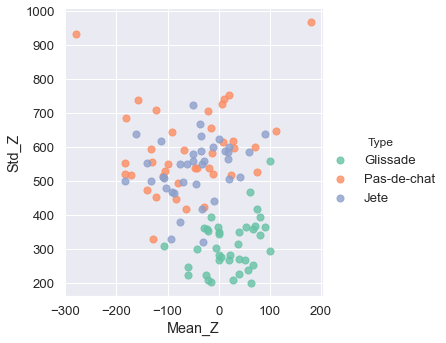

In [181]:
# Quick look at the plot for Accel data -- MODEL ! looking at Mean_Z and Std_Z
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)

data = pd.read_csv('Allfeatures.csv')

sns.lmplot('Mean_Z', 'Std_Z',
           data=data,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

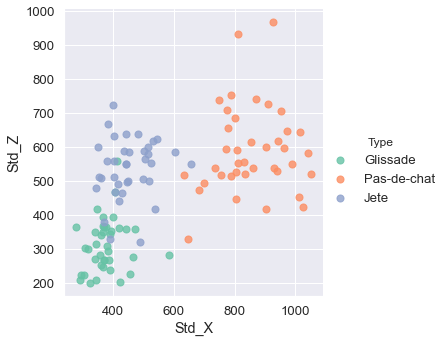

In [182]:
# Quick look at the plot for Accel data -- after running ExtraTreesClassifier  (Std_X and Std_Z are most significant)
# MODEL 2

from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)

data = pd.read_csv('Allfeatures.csv')

sns.lmplot('Std_X', 'Std_Z',
           data=data,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

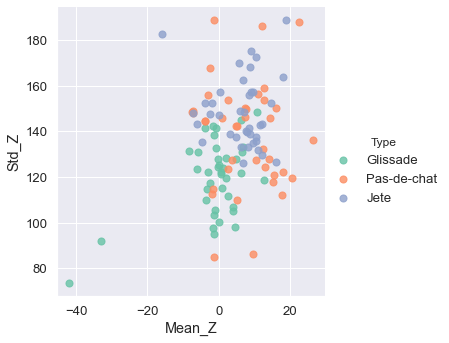

In [183]:
# Quick look at the plot for Gyro data
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)

data_gryo = pd.read_csv('features_gyro.csv')

sns.lmplot('Mean_Z', 'Std_Z',
           data=data_gyro,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

CREATE MODELS.

We will use SVM.SVC models to prediction the accuracy of our test data. We will train 3 different models using 3 different kernels. 
model -- LINEAR kernel, 
RBFmodel -- RBF kernel, C=1, gamma=0.001
and POLYmodel -- POLY kernel, order 2, C=1, gamma=auto

We will focus on Accel model in our analysis but we will also train the Gyro models.


    NOTE: Next chunk of code is for model 1 (Mean_Z, Std_Z) and the following chunk is model 2 (Std_X, Std_Z) --- pick one to run at a time.

In [32]:
# MODEL using ACCEL features for 3 JUMPS -- using Mean_Z and STD_Z

#C=1
#gamma=0.1


X = data[['Mean_Z','Std_Z']].values
y = np.where(data['Type']=='Pas-de-chat', 1, #--2 for Jete, 1 for Pas-de-chat and 0 for Glissade---
         (np.where(data['Type']=='Glissade', 0 , 2)))
model = svm.SVC(kernel='linear').fit(X, y)
RBFmodel = svm.SVC(kernel='rbf', gamma=0.001, C=1).fit(X, y)
POLYmodel = svm.SVC(kernel='poly', degree=2, C=1, gamma='auto').fit(X, y)



In [184]:
# MODEL using ACCEL features for 3 JUMPS --- using STD_X and STD_Z

#C=1
#gamma=0.1


X = data[['Std_X','Std_Z']].values
y = np.where(data['Type']=='Pas-de-chat', 1, #--2 for Jete, 1 for Pas-de-chat and 0 for Glissade---
         (np.where(data['Type']=='Glissade', 0 , 2)))
model = svm.SVC(kernel='linear').fit(X, y)
RBFmodel = svm.SVC(kernel='rbf', gamma=0.001, C=1).fit(X, y)
POLYmodel = svm.SVC(kernel='poly', degree=2, C=1, gamma='auto').fit(X, y)




In [185]:
# MODEL using GYRO features for 3 JUMPS

#C=1
#gamma=0.1


A = data_gyro[['Mean_Z','Std_Z']].values
b = np.where(data_gyro['Type']=='Pas-de-chat', 1, #--2 for Jete, 1 for Pas-de-chat and 0 for Glissade---
         (np.where(data_gyro['Type']=='Glissade', 0 , 2)))
model_gyro = svm.SVC(kernel='linear').fit(A, b)
RBFmodel_gyro = svm.SVC(kernel='rbf', gamma=0.001, C=1).fit(A, b)
POLYmodel_gyro = svm.SVC(kernel='poly', degree=2, C=1, gamma='auto').fit(A, b)



CREATE Model plots. 



Text(0.5, 1.0, 'SVC with Linear kernel')

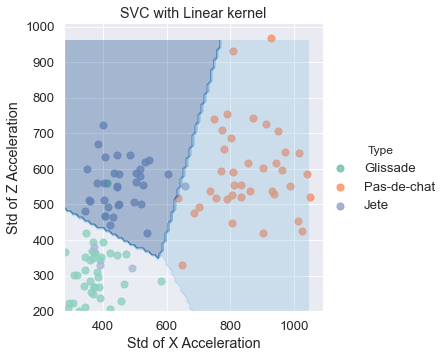

In [187]:
from numpy import c_

# This is for the linear model ACCEL data

sns.lmplot('Std_X', 'Std_Z',
           data=data,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = abs((x_max / x_min) / 20)
h = abs((x_max / x_min) / 0.4)
#print(h)

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(x_min,x_max, y_min, y_max, h)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Std of X Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("SVC with Linear kernel")
#Figure below shows the points and the classes to which they belong.

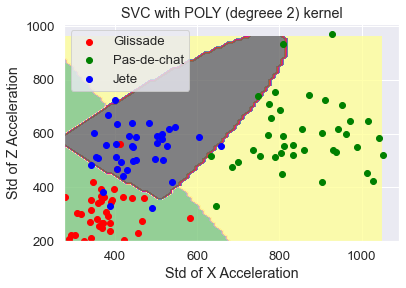

In [188]:
from numpy import c_

# This is for the POLY model ACCEL data


#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = abs((x_max / x_min) / 0.4)


#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(x_min,x_max, y_min, y_max, h)
Z = POLYmodel.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
feature_names = ['Mean_Z', 'Std_Z']
jumps = ['Glissade','Pas-de-chat', 'Jete']
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], jumps):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Std of X Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("SVC with POLY (degreee 2) kernel")
plt.legend(loc='best', shadow=False, scatterpoints=1)
#Figure below shows the points and the classes to which they belong.


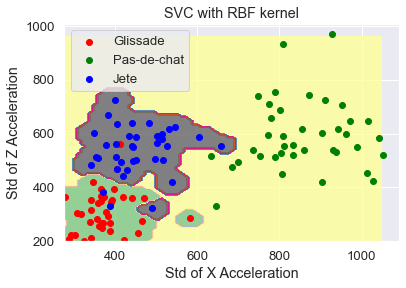

In [189]:
from numpy import c_

# This is for the RBF model ACCEL data


#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = abs((x_max / x_min) / 0.4)


#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(x_min,x_max, y_min, y_max, h)
Z = RBFmodel.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
feature_names = ['Mean_Z', 'Std_Z']
jumps = ['Glissade','Pas-de-chat', 'Jete']
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], jumps):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Std of X Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("SVC with RBF kernel")
plt.legend(loc='best', shadow=False, scatterpoints=1)
#Figure below shows the points and the classes to which they belong.




DEFINE FUNCTIONS for accuracy testing of the model.



MODEL 1 - using Mean_Z and STD_Z



In [190]:
# PREDICTION RBF ACCEL
def What_Jump_RBF(Mean_Z, Std_Z):
    if(RBFmodel.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(RBFmodel.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [191]:
# PREDICTION POLY ACCEL
def What_Jump_POLY(Mean_Z, Std_Z):
    if(POLYmodel.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(POLYmodel.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [192]:
# PREDICTION LINEAR ACCEL
def What_Jump(Mean_Z, Std_Z):
    if(model.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(model.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')



MODEL 2 - using Std_X and STD_Z



In [193]:
# PREDICTION LINEAR ACCEL STDXY model
def What_Jump_std(Std_X, Std_Z):
    if(model.predict([[Std_X, Std_Z]]))==0:
        print('Glissade')
    elif(model.predict([[Std_X, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [194]:
# PREDICTION POLY ACCEL STDXY model
def What_Jump_POLYstd(Std_X, Std_Z):
    if(model_POLY.predict([[Std_X, Std_Z]]))==0:
        print('Glissade')
    elif(model_POLY.predict([[Std_X, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [195]:
# PREDICTION RBF ACCEL STDXY model
def What_Jump_RBFstd(Std_X, Std_Z):
    if(model_RBF.predict([[Std_X, Std_Z]]))==0:
        print('Glissade')
    elif(model_RBF.predict([[Std_X, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')



SAVE FEATURES OF TEST DATA.

We  will now read in the test datasets from CSV files and save the features (MEAN_Z and STD_Z) in a features CSV file in order to test the models. 

We have 2 test datasets. The data in test subdirectories is data taken by the same intermediate skill-level dancer that trained the model. The data taken in testBD subdirectories is data taken by a beginner skill-level dancer to further test the models.


In [196]:
# Read in Glissade TEST data and check predictions - ACCEL

gtest_dir = 'data/glissade/Accel/test'
# make list of CSV files
gtest_csvs = [x for x in os.listdir(gtest_dir) if x.endswith('.csv')]

# stats.csv -> stats
gtest_count = [os.path.splitext(os.path.basename(x))[0] for x in gtest_csvs]
#print(len(gtest_count))

# Create a dictionary of dataframes for TEST data
dg_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(gtest_count)):
        gtest_csvfile = os.path.join(gtest_dir, gtest_csvs[i])
        dg_test[i] = pd.read_csv(gtest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dg_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [197]:
# Read in Glissade TEST data from BD (Beginner dancer) and check predictions - ACCEL

gtestBD_dir = 'data/glissade/Accel/testBD'
# make list of CSV files
gtestBD_csvs = [x for x in os.listdir(gtestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
gtestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in gtestBD_csvs]
#print(len(gtest_count))

# Create a dictionary of dataframes for TEST data
dg_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(gtestBD_count)):
        gtestBD_csvfile = os.path.join(gtestBD_dir, gtestBD_csvs[i])
        dg_testBD[i] = pd.read_csv(gtestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dg_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']



Get FEATURES (MEAN_Z STD_Z) for TEST and TESTBD 



In [198]:
# Get GLISSADE FEATURES (Mean_Z and STD_Z) for TEST data into CSV file -ACCEL

gtest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(gtest_count)):
    gtest_features = gtest_features.append({'Mean_Z': dg_test[i]["Accel_Z"].mean(), 'Std_Z': dg_test[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    

# Save the dataframe in a CSV file
gtest_features.to_csv('gtest_features.csv', index=False)

In [199]:
# Get GLISSADE FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file  - ACCEL

gtestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(gtestBD_count)):
    gtestBD_features = gtestBD_features.append({'Mean_Z': dg_testBD[i]["Accel_Z"].mean(), 'Std_Z': dg_testBD[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    
    

# Save the dataframe in a CSV file
gtestBD_features.to_csv('gtest_features.csv', index=False)



FEATURES (STD_X and STD_Z) for TEST and TESTBD



In [200]:
# Get GLISSADE FEATURES (Std_X and STD_Z) for TEST data into CSV file -ACCEL --ALLFEATURES.csv

gtest_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(gtest_count)):
    gtest_STDfeatures = gtest_STDfeatures.append({'Std_X': dg_test[i]["Accel_X"].std(), 'Std_Z': dg_test[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    

# Save the dataframe in a CSV file
gtest_STDfeatures.to_csv('gtest_STDfeatures.csv', index=False)

In [201]:
# Get GLISSADE FEATURES (Std_X and STD_Z) for TESTBD data into CSV file  - ACCEL--ALLFEATURES.csv

gtestBD_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(gtestBD_count)):
    gtestBD_STDfeatures = gtestBD_STDfeatures.append({'Std_X': dg_testBD[i]["Accel_X"].std(), 'Std_Z': dg_testBD[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    
    

# Save the dataframe in a CSV file
gtestBD_STDfeatures.to_csv('gtest_STDfeatures.csv', index=False)



TEST the PREDICTIONS.

Printing out results for the different models and different dancers.
NOTE: Uncomment the What_Jump line for the correct model. Currently setup for model 2 with Std_X and Std_Z



In [202]:
# RESULTS for TEST Glissade using LINEAR model -- ACCEL
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAR')
print('Testing jump: Glissade')
for i in range(len(gtest_count)):
    print('Jump', i,':', end=" ")
    #What_Jump(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())
    What_Jump_std(dg_test[i]["Accel_X"].std(), dg_test[i]["Accel_Z"].std())




Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAR
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Glissade
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade


In [203]:
# RESULTS for TESTBD Glissade using LINEAR model -- ACCEL

print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: LINEAR')
print('Testing jump: Glissade')
for i in range(len(gtestBD_count)):
    print('Jump', i,':', end=" ")
    #What_Jump(dg_testBD[i]["Accel_Z"].mean(), dg_testBD[i]["Accel_Z"].std())
    What_Jump_std(dg_testBD[i]["Accel_X"].std(), dg_testBD[i]["Accel_Z"].std())


Printing results...
Data: TEST data from beginner dancer
Model: LINEAR
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Glissade
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Glissade
Jump 9 : Glissade


In [204]:
# RESULTS for test Glissade using POLY model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Glissade')
for i in range(len(gtest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_POLY(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())
    What_Jump_POLY(dg_test[i]["Accel_X"].std(), dg_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Glissade
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade


In [205]:
# RESULTS for testBD Glissade using POLY model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: POLY order 2')
print('Testing jump: Glissade')
for i in range(len(gtestBD_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_POLY(dg_testBD[i]["Accel_Z"].mean(), dg_testBD[i]["Accel_Z"].std())
    What_Jump_POLY(dg_testBD[i]["Accel_X"].std(), dg_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: POLY order 2
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Glissade
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Glissade
Jump 9 : Glissade


In [206]:
# RESULTS for test Glissade using RBF model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: RBF')
print('Testing jump: Glissade')
for i in range(len(gtest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())
    What_Jump_RBF(dg_test[i]["Accel_X"].std(), dg_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: RBF
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Pas-de-chat
Jump 6 : Glissade
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade


In [207]:
# RESULTS for testBD Glissade using RBF model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: RBF')
print('Testing jump: Glissade')
for i in range(len(gtestBD_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dg_testBD[i]["Accel_Z"].mean(), dg_testBD[i]["Accel_Z"].std())
    What_Jump_RBF(dg_testBD[i]["Accel_X"].std(), dg_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: RBF
Testing jump: Glissade
Jump 0 : Pas-de-chat
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Pas-de-chat
Jump 6 : Glissade
Jump 7 : Pas-de-chat
Jump 8 : Glissade
Jump 9 : Glissade




Now work on TEST data for Pas-de-chat



In [208]:
# Read in Pas-de-chat TEST data 

ptest_dir = 'data/pas-de-chat/Accel/test'
# make list of CSV files
ptest_csvs = [x for x in os.listdir(ptest_dir) if x.endswith('.csv')]

# stats.csv -> stats
ptest_count = [os.path.splitext(os.path.basename(x))[0] for x in ptest_csvs]
#print(len(ptest_count))

# Create a dictionary of dataframes for TEST data
dp_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(ptest_count)):
        ptest_csvfile = os.path.join(ptest_dir, ptest_csvs[i])
        dp_test[i] = pd.read_csv(ptest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dp_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [209]:
# Read in Pas-de-chat TESTBD data 

ptestBD_dir = 'data/pas-de-chat/Accel/testBD'
# make list of CSV files
ptestBD_csvs = [x for x in os.listdir(ptestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
ptestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in ptestBD_csvs]


# Create a dictionary of dataframes for TEST data
dp_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(ptestBD_count)):
        ptestBD_csvfile = os.path.join(ptestBD_dir, ptestBD_csvs[i])
        dp_testBD[i] = pd.read_csv(ptestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dp_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']


Get FEATURES for Pas-de-chat (Mean_Z, Std_Z) for Accel and (Std_X, STd_Z) for Accel 


In [210]:
# Get Pas-de-chat FEATURES (Mean_Z and STD_Z) for TEST data into CSV file

ptest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])
ptest_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(ptest_count)):
    ptest_features = ptest_features.append({'Mean_Z': dp_test[i]["Accel_Z"].mean(), 'Std_Z': dp_test[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    ptest_STDfeatures = ptest_STDfeatures.append({'Std_X': dp_test[i]["Accel_X"].std(), 'Std_Z': dp_test[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)

# Save the dataframe in a CSV file
ptest_features.to_csv('ptest_features.csv', index=False)
ptest_STDfeatures.to_csv('ptest_STDfeatures.csv', index=False)

In [211]:
# Get Pas-de-chat FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file

ptestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])
ptestBD_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(ptestBD_count)):
    ptestBD_features = ptestBD_features.append({'Mean_Z': dp_testBD[i]["Accel_Z"].mean(), 'Std_Z': dp_testBD[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    ptestBD_STDfeatures = ptestBD_STDfeatures.append({'Std_X': dp_testBD[i]["Accel_X"].std(), 'Std_Z': dp_testBD[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)

# Save the dataframe in a CSV file
ptestBD_features.to_csv('ptestBD_features.csv', index=False)
ptestBD_STDfeatures.to_csv('ptestBD_STDfeatures.csv', index=False)


RESULTS for Pas-de-chat



In [212]:
# RESULTS for test Pas-de-chat using LINEAR model

print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAR')
print('Testing jump: Pas-de-chat')
for i in range(len(ptest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())
    What_Jump(dp_test[i]["Accel_X"].std(), dp_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAR
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [213]:
# RESULTS for testBD Pas-de-chat using LINEAR model

print('Printing results...')
print('Data: TEST data from beginner skilled dancer')
print('Model: LINEAR')
print('Testing jump: Pas-de-chat')
for i in range(len(ptestBD_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump(dp_testBD[i]["Accel_Z"].mean(), dp_testBD[i]["Accel_Z"].std())
    What_Jump(dp_testBD[i]["Accel_X"].std(), dp_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner skilled dancer
Model: LINEAR
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [214]:
# RESULTS for test Pas-de-chat using POLY model

print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Pas-de-chat')
for i in range(len(ptest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_POLY(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())
    What_Jump_POLY(dp_test[i]["Accel_X"].std(), dp_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [215]:
# RESULTS for testBD Pas-de-chat using POLY model

print('Printing results...')
print('Data: TEST data from beginner skilled dancer')
print('Model: POLY order 2# RESULTS for test Pas-de-chat using RBF model')
#for i in range(len(ptest_count)):
#    What_Jump_RBF(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())')
print('Testing jump: Pas-de-chat')
for i in range(len(ptestBD_count)):
    print('Jump', i,':', end=" ")   
    #What_Jump_POLY(dp_testBD[i]["Accel_Z"].mean(), dp_testBD[i]["Accel_Z"].std())
    What_Jump_POLY(dp_testBD[i]["Accel_X"].std(), dp_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner skilled dancer
Model: POLY order 2# RESULTS for test Pas-de-chat using RBF model
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [216]:
# RESULTS for test Pas-de-chat using RBF model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: RBF')
print('Testing jump: Pas-de-chat')
for i in range(len(ptest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())
    What_Jump_RBF(dp_test[i]["Accel_X"].std(), dp_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: RBF
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [217]:
# RESULTS for testBD Pas-de-chat using RBF model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: RBF')
print('Testing jump: Pas-de-chat')
for i in range(len(ptestBD_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dp_testBD[i]["Accel_Z"].mean(), dp_testBD[i]["Accel_Z"].std())
    What_Jump_RBF(dp_testBD[i]["Accel_X"].std(), dp_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: RBF
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat




Now work on Jete TEST data



In [218]:
# Read in Jete TEST data and check predictions

## THERE ARE 2 JETE datasets -- the second one is better quality ##

#jtest_dir = 'data/jete/Accel/test'
jtest_dir = 'data/jete/Accel/test2'
# make list of CSV files
jtest_csvs = [x for x in os.listdir(jtest_dir) if x.endswith('.csv')]

# stats.csv -> stats
jtest_count = [os.path.splitext(os.path.basename(x))[0] for x in jtest_csvs]
#print(len(jtest_count))

# Create a dictionary of dataframes for TEST data
dj_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(jtest_count)):
        jtest_csvfile = os.path.join(jtest_dir, jtest_csvs[i])
        dj_test[i] = pd.read_csv(jtest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dj_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [219]:
# Read in Jete TESTBD data and check predictions

jtestBD_dir = 'data/jete/Accel/testBD'
# make list of CSV files
jtestBD_csvs = [x for x in os.listdir(jtestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
jtestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in jtestBD_csvs]


# Create a dictionary of dataframes for TEST data
dj_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(jtestBD_count)):
        jtestBD_csvfile = os.path.join(jtestBD_dir, jtestBD_csvs[i])
        dj_testBD[i] = pd.read_csv(jtestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dj_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']



Get FEATURES for TEST data (Mean_Z and Std_Z) and )Std_X and Std_Z)

In [220]:
# Get Jete FEATURES (Mean_Z and STD_Z) for TEST data into CSV file

jtest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])
jtest_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(jtest_count)):
    jtest_features = jtest_features.append({'Mean_Z': dj_test[i]["Accel_Z"].mean(), 'Std_Z': dj_test[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    jtest_STDfeatures = jtest_STDfeatures.append({'Std_X': dj_test[i]["Accel_X"].std(), 'Std_Z': dj_test[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    

# Save the dataframe in a CSV file
jtest_features.to_csv('jtest_features.csv', index=False)
jtest_STDfeatures.to_csv('jtest_STDfeatures.csv', index=False)

In [221]:
# Get Jete FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file

jtestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])
jtestBD_STDfeatures = pd.DataFrame(columns=['Std_X','Std_Z'])

for i in range(len(jtestBD_count)):
    jtestBD_features = jtestBD_features.append({'Mean_Z': dj_testBD[i]["Accel_Z"].mean(), 'Std_Z': dj_testBD[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    jtestBD_STDfeatures = jtestBD_STDfeatures.append({'Std_X': dj_testBD[i]["Accel_X"].std(), 'Std_Z': dj_testBD[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)

# Save the dataframe in a CSV file
jtestBD_features.to_csv('jtestBD_features.csv', index=False)
jtestBD_STDfeatures.to_csv('jtestBD_STDfeatures.csv', index=False)



RESULTS For Jete



In [222]:
# RESULTS for TEST Jete using LINEAR model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAR')
print('Testing jump: Jete')
for i in range(len(jtest_count)):
    print('Jump', i,':', end=" ")
    #What_Jump(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())
    What_Jump(dj_test[i]["Accel_X"].std(), dj_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAR
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Jete
Jump 2 : Jete
Jump 3 : Jete
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Jete


In [223]:

# RESULTS for TESTBD Jete using LINEAR model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: LINEAR')
print('Testing jump: Jete')
for i in range(len(jtestBD_count)):
    print('Jump', i,':', end=" ")
    #What_Jump(dj_testBD[i]["Accel_Z"].mean(), dj_testBD[i]["Accel_Z"].std())
    What_Jump(dj_testBD[i]["Accel_X"].std(), dj_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: LINEAR
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Jete
Jump 4 : Jete
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Glissade
Jump 10 : Jete


In [224]:
# RESULTS for test Jete using POLY model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Jete')
for i in range(len(jtest_count)):
    print('Jump', i,':', end=" ")
    #What_Jump_POLY(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())
    What_Jump_POLY(dj_test[i]["Accel_X"].std(), dj_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Jete
Jump 2 : Jete
Jump 3 : Jete
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Jete


In [225]:
# RESULTS for test Jete using POLY model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: POLY order 2')
print('Testing jump: Jete')
for i in range(len(jtestBD_count)):
    print('Jump', i,':', end=" ")
    #What_Jump_POLY(dj_testBD[i]["Accel_Z"].mean(), dj_testBD[i]["Accel_Z"].std())
    What_Jump_POLY(dj_testBD[i]["Accel_X"].std(), dj_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: POLY order 2
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Jete
Jump 4 : Jete
Jump 5 : Jete
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Glissade
Jump 10 : Jete


In [226]:
# RESULTS for test Jete using RBF model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: RBF')
print('Testing jump: Jete')
for i in range(len(jtest_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())
    What_Jump_RBF(dj_test[i]["Accel_X"].std(), dj_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: RBF
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Jete
Jump 2 : Jete
Jump 3 : Jete
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Pas-de-chat
Jump 7 : Jete
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [227]:
# RESULTS for testBD Jete using RBF model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: RBF')
print('Testing jump: Jete')
for i in range(len(jtestBD_count)):
    print('Jump', i,':', end=" ") 
    #What_Jump_RBF(dj_testBD[i]["Accel_Z"].mean(), dj_testBD[i]["Accel_Z"].std())
    What_Jump_RBF(dj_testBD[i]["Accel_X"].std(), dj_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: RBF
Testing jump: Jete
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Jete
Jump 3 : Jete
Jump 4 : Jete
Jump 5 : Glissade
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Pas-de-chat
Jump 9 : Glissade
Jump 10 : Jete





VISUALIZE the TEST data.

Plotting the test data as a check to make sure the data looks good. 




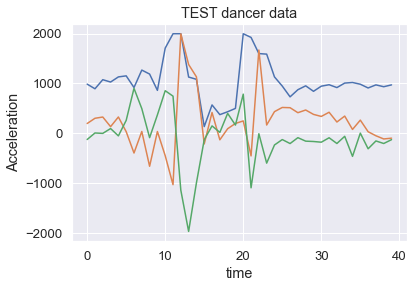

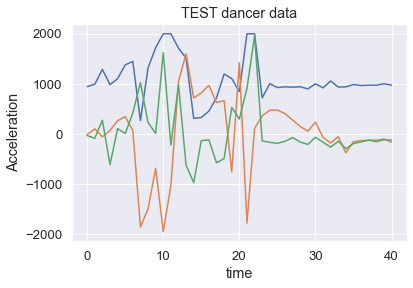

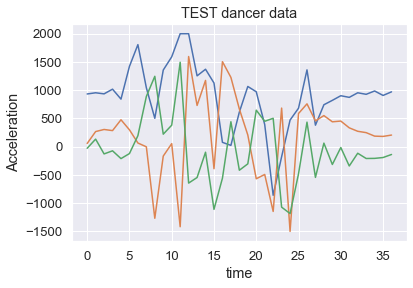

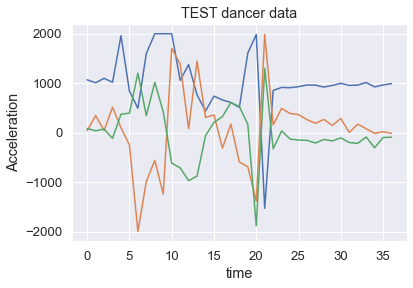

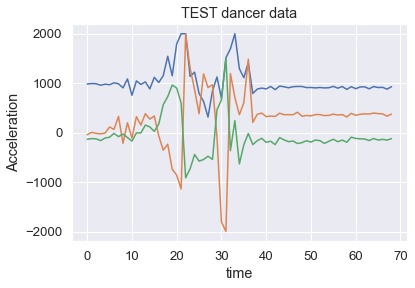

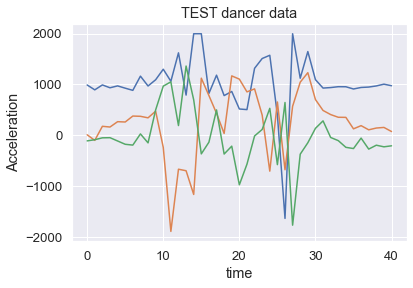

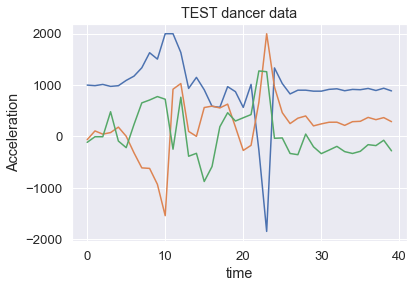

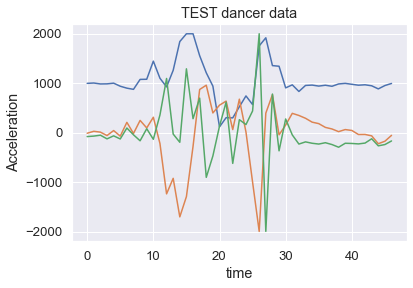

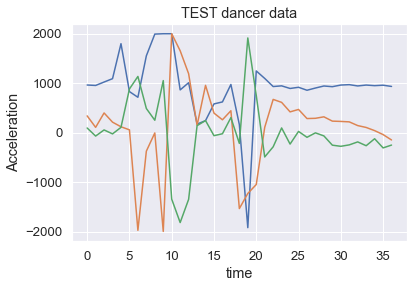

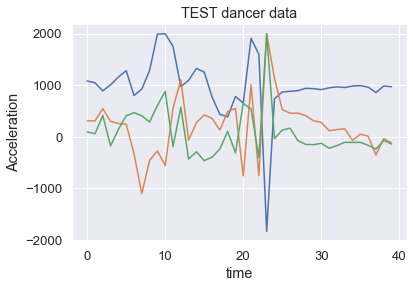

['ja49.csv', 'ja48.csv', 'ja45.csv', 'ja44.csv', 'ja50.csv', 'ja46.csv', 'ja47.csv', 'ja43.csv', 'ja42.csv', 'ja41.csv']


In [228]:
# PLOT Test data

for i in range(len(jtest_count)):
    plt.figure()
    plt.plot(dj_test[i].Accel_X)
    plt.plot(dj_test[i].Accel_Y)
    plt.plot(dj_test[i].Accel_Z)
    plt.title("TEST dancer data")     # sets the title for the chart
    plt.xlabel("time")   # sets the label to use for the x-axis
    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

print(jtest_csvs)